In [1]:
# generate graph and create adjacency
from __future__ import division
import numpy as np
import GHRGbuild
import metrics
import helperfunctions
import spectral_algorithms_new as spectral
from matplotlib import pyplot as plt
%matplotlib notebook

DendroPY not supported.


Hierarchy Level:  0 | KS Detectable:  True | Link Probabilities in / out per block:  0.002637245455479685 0.000967614126398246
Hierarchy Level:  1 | KS Detectable:  True | Link Probabilities in / out per block:  0.0051732512922186774 0.0013692425371101887
Hierarchy Level:  2 | KS Detectable:  True | Link Probabilities in / out per block:  0.011325266314303804 0.0020972437811761137





 START INFERENCE
number nodes /groups
(19683, 27)


HIER SPECTRAL PARTITION -- agglomerative

Initial partition into 27 groups 

List of partitions to assess:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27] 

Current shape of network:  (19683, 19683) 

Current levels:  [27] 

Ks, local_min, below_thresh, levels
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27] [ 3  9 14 19 21] [ 1  3  9 27] [3 9]
agglomeration level candidate
3
Ks, local_min, below_thresh, levels
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24


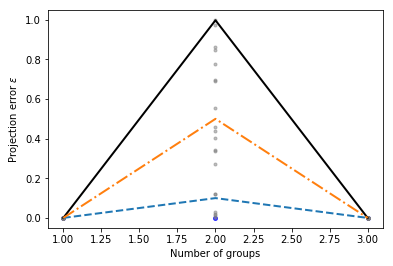

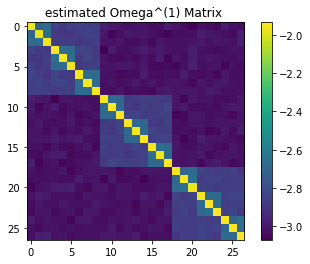

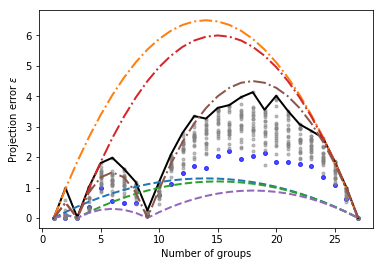

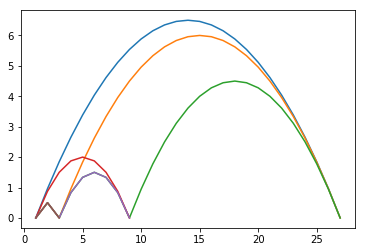

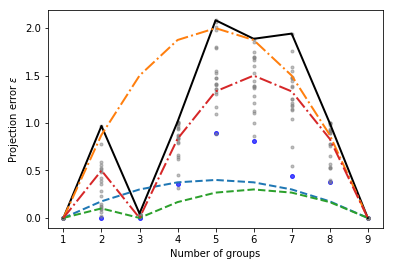

In [4]:
plt.close("all")
# Create an aggregated graph as we would have in the test loop
# and check current agglomeration practis
n = 3**9
groups_per_level = 3
n_levels = 3
snr = 4
c_bar = 30

# generate graph and create adjacency
D_actual = GHRGbuild.create2paramGHRG(n, snr, c_bar, n_levels, groups_per_level)
G = D_actual.generateNetworkExactProb()
Aorg = D_actual.to_scipy_sparse_matrix(G)

# get true hierarchy
true_pvec = D_actual.get_partition_all()

H = helperfunctions.create_partition_matrix_from_vector(true_pvec[-1])
Omegahat = np.log10(H.T*Aorg*H / (H.T.sum(axis=1)* H.T.sum(axis=1).T))
Omegahat[np.isinf(Omegahat)] = 0
plt.figure()
plt.imshow(Omegahat.A)
plt.colorbar()
plt.title("estimated Omega^(1) Matrix ")
plt.savefig("estimatedOmega.pdf")

print "\n\n\n\n\n START INFERENCE"
pvec_inf = spectral.hier_spectral_partition(Aorg, model='SBM',reps=20,noise=2e-2, Ks=None)

score_matrix = metrics.calculate_level_comparison_matrix(pvec_inf, true_pvec)
print score_matrix

precision, recall = metrics.calculate_precision_recall(score_matrix)
bottom_lvl = score_matrix[-1, -1]
print "\n\nRESULTS\n\nbottom level"
print bottom_lvl
print len(pvec_inf), len(true_pvec)
print "precision, recall"
print precision, recall

print "INFERRED PARTITION, TRUE PARTITION"
print[len(np.unique(pv)) for pv in pvec_inf]
print[len(np.unique(pv)) for pv in true_pvec]
for p in pvec_inf:
    print p
    
plt.figure(27)
plt.savefig("model_selection27.pdf")
plt.show()